# Prevendo usuários candidatos a deixar Streaming

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv("streaming_data.csv")
dados.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


### Verificando os tipos de dados e possiveis valores nulos

In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  9572 non-null   float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


# Analise exploratoria e descritiva

In [4]:
dados.describe()

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Churned
count,66607.000000,56464.000000,52696.000000,9572.000000,77884.000000,60614.000000,61148.000000
mean,43.511072,4385.848505,2.995370,2.496239,3.002273,3.002252,0.243066
std,15.043158,2526.580859,1.414072,1.120700,1.413235,1.154963,0.428938
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,30.000000,2196.000000,2.000000,1.000000,2.000000,1.990000,0.000000
50%,43.000000,4384.000000,3.000000,2.000000,3.000000,3.010000,0.000000
75%,57.000000,6573.000000,4.000000,4.000000,4.000000,4.000000,0.000000
max,69.000000,8759.000000,5.000000,4.000000,5.000000,5.000000,1.000000


### Entendendo a distribuição por idade e genero

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

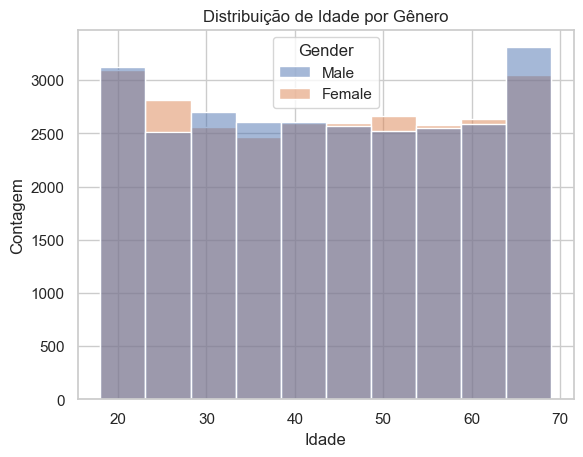

In [6]:
sns.set(style="whitegrid")

sns.histplot(data=dados, x=dados["Age"], hue=dados['Gender'], bins=10)

plt.title('Distribuição de Idade por Gênero')
plt.xlabel('Idade')
plt.ylabel('Contagem')

plt.show()

### Distribuição dos dados: Avaliação Media, Dispositivos conectados e tempo nas plataformas

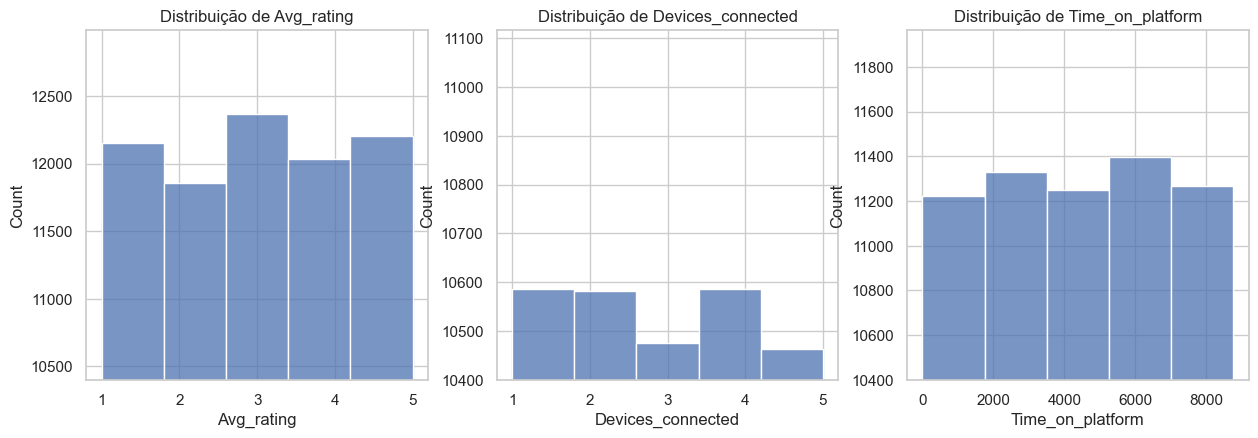

In [7]:
variaveis_para_plotar = ["Avg_rating", "Devices_connected", "Time_on_platform"]

plt.figure(figsize=(15, 10))

for i, variable in enumerate(variaveis_para_plotar, 1):
    sns.set(style="whitegrid")
    plt.subplot(2, 3, i)  # 2 linhas, 3 colunas

    sns.histplot(data=dados, x=variable, bins=5)

    plt.ylim(10400, plt.ylim()[1])
    
    plt.title(f'Distribuição de {variable}')

#plt.show()


# Identificando e tratando valores Nulos

In [8]:
dados.isnull().sum()

Age                       11277
Gender                    14516
Time_on_platform          21420
Devices_connected         25188
Subscription_type         25221
Num_streaming_services    68312
Num_active_profiles           0
Avg_rating                17270
Churned                   16736
User_id                       0
dtype: int64

### Tratando os valores nulos nas colunas indicadas

In [9]:
colunas = ['Time_on_platform', 'Num_streaming_services', 'Churned', 'Avg_rating', 'Devices_connected']

In [10]:
dados[colunas] = dados[colunas].fillna(0)

#### Verificando novamente

In [11]:
dados[colunas].isnull().sum()

Time_on_platform          0
Num_streaming_services    0
Churned                   0
Avg_rating                0
Devices_connected         0
dtype: int64

### Excluindo nulos das colunas indicadas

In [12]:
colunas = ['Gender', 'Subscription_type', 'Age']

In [13]:
dados[colunas].isnull().sum()

Gender               14516
Subscription_type    25221
Age                  11277
dtype: int64

In [14]:
dados = dados.dropna(subset=colunas)

#### Verificando novamente

In [15]:
dados[colunas].isnull().sum()

Gender               0
Subscription_type    0
Age                  0
dtype: int64

# Transformando valores floats em inteiros

In [16]:
dados.dtypes

Age                       float64
Gender                     object
Time_on_platform          float64
Devices_connected         float64
Subscription_type          object
Num_streaming_services    float64
Num_active_profiles         int64
Avg_rating                float64
Churned                   float64
User_id                    object
dtype: object

In [17]:
colunas = ['Age', 'Time_on_platform', 'Devices_connected', 'Num_streaming_services', 'Avg_rating']

dados[colunas] = dados[colunas].astype(int)

### Verificando alteração

In [18]:
dados.dtypes

Age                         int32
Gender                     object
Time_on_platform            int32
Devices_connected           int32
Subscription_type          object
Num_streaming_services      int32
Num_active_profiles         int64
Avg_rating                  int32
Churned                   float64
User_id                    object
dtype: object

# Modelagem dos Dados

### Tratando variáveis categóricas

In [19]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

dados['Gender'] = label.fit_transform(dados['Gender'])
dados['Subscription_type'] = label.fit_transform(dados['Subscription_type'])

### Separando X e Y

In [20]:
X = dados.drop(["Churned", "User_id" ], axis = 1)
y = dados["Churned"]

## Verificando balanceamento dos dados

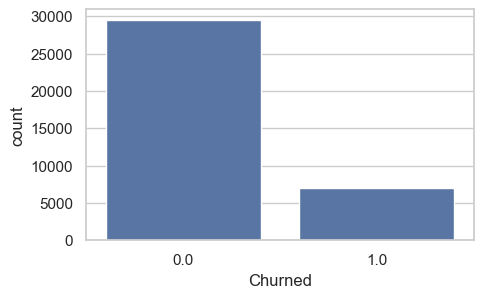

In [21]:
plt.figure(figsize=(5, 3))
ax = sns.countplot(x='Churned', data=dados)

## Balanceando com NearMiss

In [22]:
from imblearn.under_sampling import NearMiss

In [23]:
nm = NearMiss()
X, y = nm.fit_resample(X, y)

### Visualizando resultado

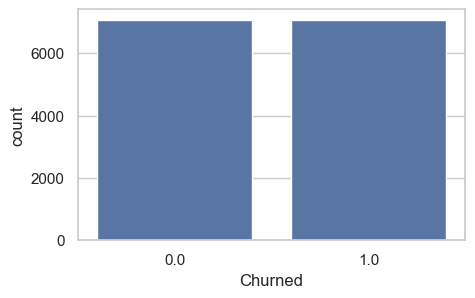

In [24]:
Ydata = pd.DataFrame(y, columns=['Churned'])
plt.figure(figsize=(5, 3))
ax = sns.countplot(x='Churned', data=Ydata)

## Separando Treino e teste

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Normalização com MinMaxScaler

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.fit_transform(x_test)

# Aplicando Regressão Logística

### Instanciando e fazendo fit do modelo

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
modelo = LogisticRegression(C = 1, penalty= 'l2')
modelo.fit(X_train_scaled, y_train)

LogisticRegression(C=1)

### Realizando Predicao

In [32]:
predicao = modelo.predict(X_test_scaled)

## Avaliando o modelo com as metricas

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score

#### Matriz de confusao

In [34]:
confusion_matrix(y_test, predicao)

array([[1392,    8],
       [ 386, 1037]], dtype=int64)

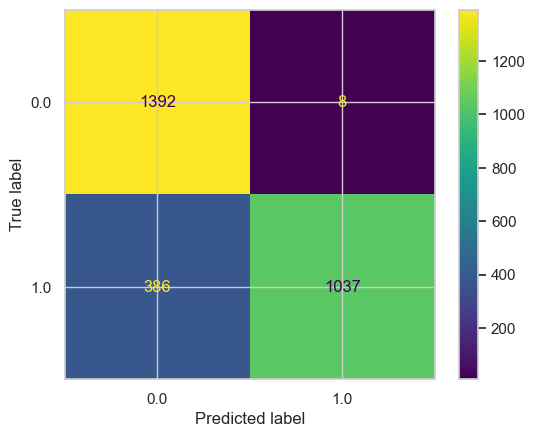

In [35]:
cm = confusion_matrix(y_test, predicao, labels=modelo.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=modelo.classes_)
disp.plot()

#### Acuracia

In [36]:
accuracy_score(y_test, predicao)

0.8604321643641516

#### Precisao

In [37]:
precision_score(y_test, predicao, pos_label=0)

0.7829021372328459

#### Recall

In [38]:
recall_score(y_test, predicao, pos_label=0)

0.9942857142857143

#### F1_Score

In [39]:
f1_score(y_test, predicao, pos_label=0)

0.8760226557583386

# Modelo: Radom Forest


In [40]:
from sklearn.ensemble import RandomForestClassifier

### Instanciando e fazendo fit do modelo

In [41]:
modelo = RandomForestClassifier()
modelo.fit(X_train_scaled, y_train)

RandomForestClassifier()

### Realizando Predição

In [42]:
predicao = modelo.predict(X_test_scaled)

## Avaliando modelo

#### Matriz de confusao

In [43]:
confusion_matrix(y_test, predicao)

array([[1287,  113],
       [ 251, 1172]], dtype=int64)

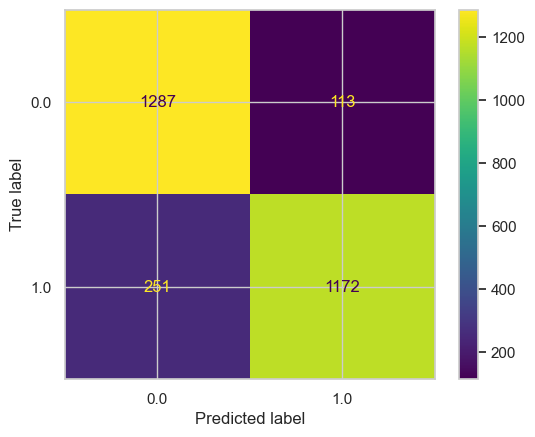

In [44]:
cm = confusion_matrix(y_test, predicao, labels=modelo.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=modelo.classes_)
disp.plot()

#### Acuracia

In [45]:
accuracy_score(y_test, predicao)

0.8710591569252568

#### Precisao

In [46]:
precision_score(y_test, predicao, pos_label=0)

0.8368010403120937

#### Recall

In [47]:
recall_score(y_test, predicao, pos_label=0)

0.9192857142857143

#### f1_score

In [48]:
f1_score(y_test, predicao, pos_label=0)

0.8761061946902655

## Utilizando GridSearchCV para seleção dos hiperparametros

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
# Definir os parâmetros que você deseja ajustar e seus intervalos
parameters = {
    'penalty': ['l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}


# Criar o modelo de Regressão Logística
logistic_regression = LogisticRegression(max_iter=1000)


# Criar o objeto GridSearchCV
grid_search = GridSearchCV(logistic_regression, parameters, scoring='accuracy', cv=5)

### Fazendo fit e visualizando resultados

In [51]:
# Ajustar o modelo aos dados de treinamento
grid_search.fit(x_train, y_train)

# Obter os melhores parâmetros
best_params = grid_search.best_params_
print("Melhores Parâmetros:", best_params)

# Avaliar o modelo nos dados de teste
y_pred = grid_search.predict(x_test)

Melhores Parâmetros: {'C': 1, 'penalty': 'l2'}
